# Credit Risk Analysis

## Import packages

1. `sys`: System-specific parameters and functions.
2. `reload` (from `imp`): Reload previously imported modules.
3. `matplotlib.pyplot`: Data visualization.
4. `numpy`: Numerical computing.
5. `pandas`: Data manipulation and analysis.
6. `seaborn`: Statistical data visualization.
7. `SimpleImputer` (from `sklearn.impute`): Handling missing data.
8. `LogisticRegression` (from `sklearn.linear_model`): Logistic regression for classification.

In [1]:
import sys

sys.path.append("..")

from imp import reload

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

from helper_functions import config, data_utils, evaluation, plot, preprocessing


import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

# import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV

# from src import config, data_utils, evaluation, plot

# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

C:\Users\Yessid\AppData\Local\Temp\ipykernel_4908\2275337687.py:5: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload


In [2]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

## Load normalized data set


In this notebook, we are going to encode a previously normalized `dataset` followed by the creation of the `ML` model.

In [3]:
app_normalized = data_utils.get_normalized_model()
app_normalized['TARGET_LABEL_BAD=1'] = app_normalized.pop('TARGET_LABEL_BAD=1')

In [4]:
app_normalized = preprocessing.categorical_columns(app_normalized)
app_normalized.head()

,PAYMENT_DAY,APPLICATION_SUBMISSION_TYPE,SEX,MARITAL_STATUS,QUANT_DEPENDANTS,RESIDENCIAL_STATE,FLAG_RESIDENCIAL_PHONE,MONTHS_IN_RESIDENCE,FLAG_EMAIL,COMPANY,...,PRODUCT,AGE,HAS_DEPENDANTS,HAS_RESIDENCE,MONTHLY_INCOMES_TOT,HAS_CARDS,HAS_BANKING_ACCOUNTS,HAS_PERSONAL_ASSETS,HAS_CARS,TARGET_LABEL_BAD=1
0,1_14,Web,F,other,1,RN,Y,>_12,1,N,...,1,26_35,True,True,[650_1320],True,False,False,False,1
1,15_30,Carga,F,married,0,RJ,Y,0_6,1,Y,...,1,26_35,False,True,[650_1320],False,False,False,False,1
2,1_14,Web,F,married,0,RN,Y,>_12,1,N,...,1,26_35,False,True,[0_650],False,False,False,False,0
3,15_30,Web,F,married,0,PE,N,>_12,1,N,...,1,>_60,False,False,[0_650],False,False,False,False,0
4,1_14,Web,M,married,0,RJ,Y,6_12,1,N,...,1,46_60,False,True,[650_1320],False,False,False,False,1


In [5]:
app_normalized.drop(columns='PRODUCT', inplace=True)
print(app_normalized.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49935 entries, 0 to 49934
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   PAYMENT_DAY                  49935 non-null  category
 1   APPLICATION_SUBMISSION_TYPE  49935 non-null  category
 2   SEX                          49935 non-null  category
 3   MARITAL_STATUS               49935 non-null  category
 4   QUANT_DEPENDANTS             49935 non-null  category
 5   RESIDENCIAL_STATE            49935 non-null  category
 6   FLAG_RESIDENCIAL_PHONE       49935 non-null  category
 7   MONTHS_IN_RESIDENCE          49935 non-null  category
 8   FLAG_EMAIL                   49935 non-null  category
 9   COMPANY                      49935 non-null  category
 10  FLAG_PROFESSIONAL_PHONE      49935 non-null  category
 11  AGE                          49935 non-null  category
 12  HAS_DEPENDANTS               49935 non-null  bool    
 13  H

### Encoding

- We do the encoding process for....

- Some of the encoding techniques offered by category_encoders are:
    - `One-Hot Encoding:` Encoding using the One-Hot Encoding method.
    - `Ordinal Encoding:` Ordinal encoding, where ordinal labels are assigned to categories.
    - `Binary Encoding:` Base-2 encoding to reduce dimensionality in categorical variables with multiple categories.
    - `BaseN Encoding:` Base-N encoding to reduce dimensionality in categorical variables with multiple categories.
    - `Target Encoding:` Encoding using the target variable to assign values to categories.
    - `CatBoost Encoding:` Specific encoding for working with the CatBoost algorithm.

In [24]:
reload(preprocessing)
app_dum = preprocessing.encoding(app_normalized, True) # True for pandas get_dummies
# app_enc = preprocessing.encoding(app_normalized, False) # False for different encoder

In [35]:
# X_train_dum, y_train_dum, X_test_dum, y_test_dum, X_val_dum, y_val_dum = data_utils.get_feature(app_dum) # using get_dummies
# X_train_enc, y_train_enc, X_test_enc, y_test_enc, X_val_enc, y_val_enc = data_utils.get_feature(app_enc) # using encoder

<module 'helper_functions.data_utils' from 'c:\\Users\\Yessid\\Desktop\\anyoneai\\credit-risk-analysis\\src\\notebooks\\..\\helper_functions\\data_utils.py'>

In [16]:
# X_train_dum, y_train_dum, X_test_dum, y_test_dum, X_val_dum, y_val_dum = data_utils.get_feature(app_dum) # using get_dummies

Best Score for Logistic Regression:  0.5858940197953084
model score for Logistic Regression: 0.578
Model Performance metrics:
------------------------------
Accuracy: 0.5756483428456994
Precision: 0.8046198267564967
Recall: 0.5646359583952452
F1 Score: 0.6635973964121289

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.80      0.56      0.66      7403
           1       0.33      0.61      0.43      2584

    accuracy                           0.58      9987
   macro avg       0.57      0.59      0.54      9987
weighted avg       0.68      0.58      0.60      9987


Prediction Confusion Matrix:
------------------------------
      0     1
0  4180  3223
1  1015  1569


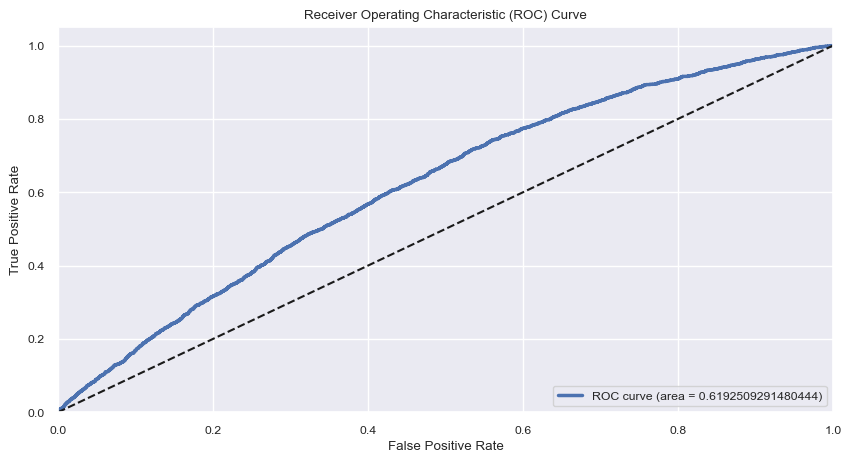

Best Score for Logistic Regression:  0.5858940197953084


In [82]:
reload(preprocessing)
lr_model = preprocessing.model_logistic_regression(app_dum, True)

In [23]:
# accuracy = evaluation.get_performance(y_hat, y_test_enc)
# evaluation.plot_roc(grid_search_enc, y_test_enc, X_test_enc)

#### DIFERENTES MODELOS GPT, SOLO USAR COMO GUIA...

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular el error cuadrático medio (MSE)
    mse = mean_squared_error(y_test, y_pred)

    # Calcular el coeficiente de determinación (R²)
    r2 = r2_score(y_test, y_pred)

    return mse, r2

In [28]:
# Dividir los datos en conjuntos de entrenamiento y prueba
# X_train, X_test, y_train, y_test = train_test_split(X_dum_res, y, test_size=0.2, random_state=42)

# Modelo de Regresión Lineal
linear_model = LinearRegression()
mse_linear, r2_linear = evaluate_model(linear_model, X_train_dum_reshape, X_test_dum, y_train_dum_reshape, y_test_dum)

# Modelo de Regresión Polinomial (grado 2)
polynomial_features = PolynomialFeatures(degree=2)
X_train_poly = polynomial_features.fit_transform(X_train_dum_reshape)
X_test_poly = polynomial_features.transform(X_test_dum)
polynomial_model = LinearRegression()
mse_poly, r2_poly = evaluate_model(polynomial_model, X_train_poly, X_test_poly, y_train_dum, y_test_dum)

# Modelo de Regresión Ridge
ridge_model = Ridge(alpha=1.0)
mse_ridge, r2_ridge = evaluate_model(ridge_model, X_train_dum_reshape, X_test_dum, y_train_dum_reshape, y_test_dum)

# Modelo de Regresión LASSO
lasso_model = Lasso(alpha=1.0)
mse_lasso, r2_lasso = evaluate_model(lasso_model, X_train_dum_reshape, X_test_dum, y_train_dum_reshape, y_test_dum)

# Modelo de Árboles de Decisión Regresión
decision_tree_model = DecisionTreeRegressor()
mse_dt, r2_dt = evaluate_model(decision_tree_model, X_train_dum_reshape, X_test_dum, y_train_dum_reshape, y_test_dum)

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Regresión Polinomial', 'Regresión Ridge', 'Regresión LASSO', 'Árboles de Decisión'],
    'MSE': [mse_linear, mse_poly, mse_ridge, mse_lasso, mse_dt],
    'R²': [r2_linear, r2_poly, r2_ridge, r2_lasso, r2_dt]
})

print(results)


                 Modelo       MSE        R²
0      Regresión Lineal  0.240032 -0.251523
1  Regresión Polinomial  0.240032 -0.251523
2       Regresión Ridge  0.239962 -0.251161
3       Regresión LASSO  0.250000 -0.303496
4   Árboles de Decisión  0.456906 -1.382301


#### THEORY
Regresión Lineal:
MSE (Error Cuadrático Medio): 0.240032
R² (Coeficiente de Determinación): -0.251523
El MSE es una métrica que mide el promedio de los errores al cuadrado entre las predicciones y los valores reales. En este caso, el valor de 0.240032 indica que el modelo de regresión lineal tiene un error cuadrático medio relativamente bajo, lo que sugiere que las predicciones son bastante cercanas a los valores reales en promedio.

El R² es una métrica que indica la proporción de la varianza en la variable de respuesta que es predecible a partir de las variables predictoras. Un valor negativo de R² significa que el modelo no se ajusta bien a los datos y que la línea de regresión no se ajusta bien a los puntos de datos.

Regresión Polinomial:
MSE: 0.240032
R²: -0.251523
En este caso, los valores de MSE y R² son los mismos que para el modelo de regresión lineal. Esto sugiere que el modelo de regresión polinomial con grado 2 no ha mejorado significativamente el rendimiento del modelo en comparación con la regresión lineal simple.

Regresión Ridge:
MSE: 0.239962
R²: -0.251161
El modelo de regresión Ridge es una variante de la regresión lineal que incorpora regularización para evitar el sobreajuste. En este caso, el valor de MSE es ligeramente menor que en la regresión lineal, lo que indica una ligera mejora en el rendimiento del modelo. Sin embargo, el valor negativo de R² aún sugiere que el modelo no se ajusta bien a los datos.

Regresión LASSO:
MSE: 0.250000
R²: -0.303496
La regresión LASSO también es una variante de la regresión lineal con regularización, pero utiliza una técnica diferente para penalizar los coeficientes de las variables. En este caso, el valor de MSE es ligeramente mayor que en los modelos anteriores, lo que indica un rendimiento ligeramente inferior. El valor negativo de R² sugiere que el modelo tampoco se ajusta bien a los datos.

Árboles de Decisión:
MSE: 0.456906
R²: -1.382301
Los árboles de decisión son un tipo de modelo no lineal que divide el espacio de características en regiones y realiza predicciones en función de la región en la que cae una observación. El valor de MSE es más alto que en los modelos anteriores, lo que indica un mayor error en las predicciones. El valor negativo de R² indica que el árbol de decisión no es un buen modelo para este conjunto de datos y que su rendimiento es peor que simplemente usar la media como predicción.

En resumen, ninguno de los modelos parece ajustarse bien a los datos, ya que todos tienen valores negativos de R², lo que indica que no explican bien la variabilidad en los datos. Es posible que se requieran ajustes en los hiperparámetros del modelo o una exploración más profunda de los datos para mejorar el rendimiento del modelo. Además, sería útil considerar otras métricas de evaluación y realizar una validación cruzada para obtener una estimación más robusta del rendimiento del modelo.

In [29]:
#  linear regresion model:
linear_model = LinearRegression()
parameters = {}
grid_search_linear = GridSearchCV(linear_model, parameters, cv=5)
grid_search_linear.fit(X_train_dum_reshape, y_train_dum_reshape)
best_linear_model = grid_search_linear.best_estimator_

mse_linear, r2_linear = evaluate_model(best_linear_model, X_train_dum_reshape, X_test_dum, y_train_dum_reshape, y_test_dum)


In [31]:
# Modelo de Regresión Ridge:
ridge_model = Ridge()
parameters = {'alpha': [0.1, 1.0, 10.0]}
grid_search_ridge = GridSearchCV(ridge_model, parameters, cv=5)
grid_search_ridge.fit(X_train_dum_reshape, y_train_dum_reshape)
best_ridge_model = grid_search_ridge.best_estimator_

mse_ridge, r2_ridge = evaluate_model(best_ridge_model, X_train_dum_reshape, X_test_dum, y_train_dum_reshape, y_test_dum)


In [32]:
# Modelo de Regresión LASSO:
lasso_model = Lasso()
parameters = {'alpha': [0.1, 1.0, 10.0]}
grid_search_lasso = GridSearchCV(lasso_model, parameters, cv=5)
grid_search_lasso.fit(X_train_dum_reshape, y_train_dum_reshape)
best_lasso_model = grid_search_lasso.best_estimator_

mse_lasso, r2_lasso = evaluate_model(best_lasso_model, X_train_dum_reshape, X_test_dum, y_train_dum_reshape, y_test_dum)


In [33]:
# Modelo de Árboles de Decisión Regresión:
decision_tree_model = DecisionTreeRegressor()
parameters = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(decision_tree_model, parameters, cv=5)
grid_search_dt.fit(X_train_dum_reshape, y_train_dum_reshape)
best_dt_model = grid_search_dt.best_estimator_

mse_dt, r2_dt = evaluate_model(best_dt_model, X_train_dum_reshape, X_test_dum, y_train_dum_reshape, y_test_dum)


In [37]:
results = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Regresión Ridge', 'Regresión LASSO', 'Árboles de Decisión'],
    'MSE': [mse_linear, mse_ridge, mse_lasso, mse_dt],
    'R²': [r2_linear, r2_ridge, r2_lasso, r2_dt]
})

print(results)

                Modelo       MSE        R²
0     Regresión Lineal  0.240032 -0.251523
1      Regresión Ridge  0.239822 -0.250430
2      Regresión LASSO  0.250000 -0.303496
3  Árboles de Decisión  0.254111 -0.324929


In [43]:
correlation_with_other_columns = app_normalized.corrwith(app_normalized['TARGET_LABEL_BAD=1'])